In [13]:
# Step 1: Loading the Data
import pandas as pd

# Load the Company_Data dataset
data = pd.read_csv("/content/Company_Data.csv")

In [14]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
# Step 2: Data Preprocessing
# Convert 'Sales' variable into categorical
data['Sales_Category'] = pd.cut(data['Sales'], bins=[-float('inf'), 5000, float('inf')], labels=['Low', 'High'])


In [16]:
# Drop original 'Sales' column
data.drop('Sales', axis=1, inplace=True)

In [17]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

In [18]:
# Step 3: Splitting Data
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target variable (y)
X = data.drop('Sales_Category', axis=1)
y = data['Sales_Category']

In [19]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
 [[80]]


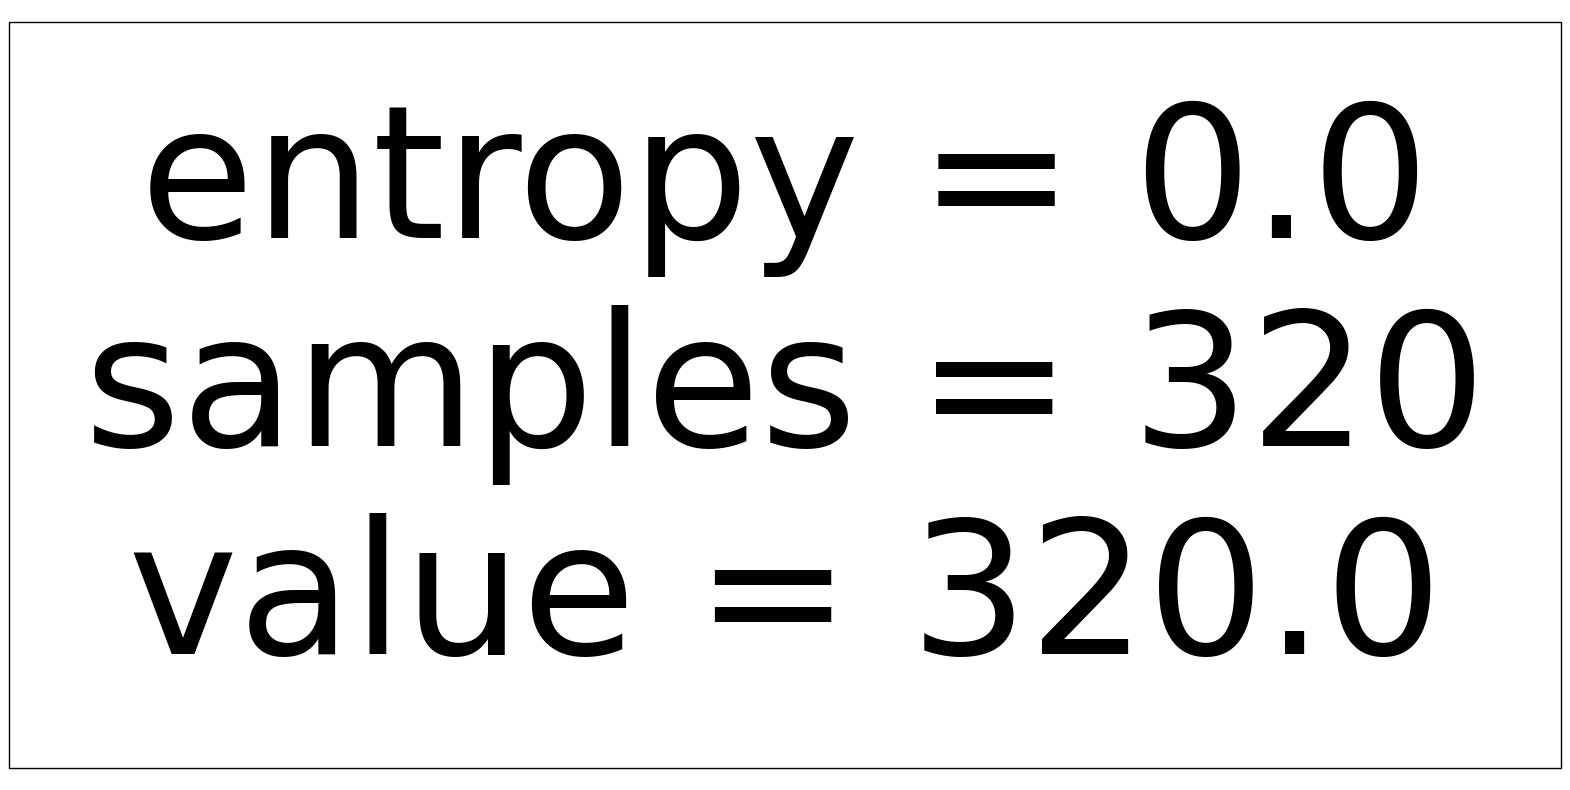

In [22]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()
